<a href="https://colab.research.google.com/github/ScarlaAvionic/Prak-Machine-Learning-Pert-6/blob/main/1227050132_Viqriza_Ahmad_V_Prak_Machine_Learning_Tugas_ke_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Praktikum Machine Learning: Klasifikasi Wine Dataset
Nama: Viqriza Ahmad Vahira

NIM: [1227050132]

Pada praktikum ini, digunakan dataset wine dari library sklearn untuk melakukan klasifikasi menggunakan algoritma Decision Tree.
Tujuannya adalah memahami preprocessing data, pelatihan model, evaluasi, dan visualisasi hasil.


In [1]:

# Load Dataset dan Konversi ke DataFrame
from sklearn.datasets import load_wine
import pandas as pd

def to_dataframe(dataset):
    data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    data['label'] = dataset.target
    return data

wine_data = load_wine()
df_wine = to_dataframe(wine_data)

df_wine.head()


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  label  
0                          3.92   1065.0      0  
1                          3.40   1050.0      0  
2                          3.17   1185.0      0  
3                          3.45   1480.0      0  
4                          2.93    735.0      0

In [2]:
# Statistik Deskriptif
df_wine.describe().T


count        mean         std     min       25%  \
alcohol                       178.0   13.000618    0.811827   11.03   12.3625   
malic_acid                    178.0    2.336348    1.117146    0.74    1.6025   
ash                           178.0    2.366517    0.274344    1.36    2.2100   
alcalinity_of_ash             178.0   19.494944    3.339564   10.60   17.2000   
magnesium                     178.0   99.741573   14.282484   70.00   88.0000   
total_phenols                 178.0    2.295112    0.625851    0.98    1.7425   
flavanoids                    178.0    2.029270    0.998859    0.34    1.2050   
nonflavanoid_phenols          178.0    0.361854    0.124453    0.13    0.2700   
proanthocyanins               178.0    1.590899    0.572359    0.41    1.2500   
color_intensity               178.0    5.058090    2.318286    1.28    3.2200   
hue                           178.0    0.957449    0.228572    0.48    0.7825   
od280/od315_of_diluted_wines  178.0    2.611685    0.709990    1.27    1.9375   
proline                       178.0  746.893258  314.907474  278.00  500.5000   
label                         178.0    0.938202    0.775035    0.00    0.0000   

                                  50%       75%      max  
alcohol                        13.050   13.6775    14.83  
malic_acid                      1.865    3.0825     5.80  
ash                             2.360    2.5575     3.23  
alcalinity_of_ash              19.500   21.5000    30.00  
magnesium                      98.000  107.0000   162.00  
total_phenols                   2.355    2.8000     3.88  
flavanoids                      2.135    2.8750     5.08  
nonflavanoid_phenols            0.340    0.4375     0.66  
proanthocyanins                 1.555    1.9500     3.58  
color_intensity                 4.690    6.2000    13.00  
hue                             0.965    1.1200     1.71  
od280/od315_of_diluted_wines    2.780    3.1700     4.00  
proline                       673.500  985.0000  1680.00  
label                           1.000    2.0000     2.00

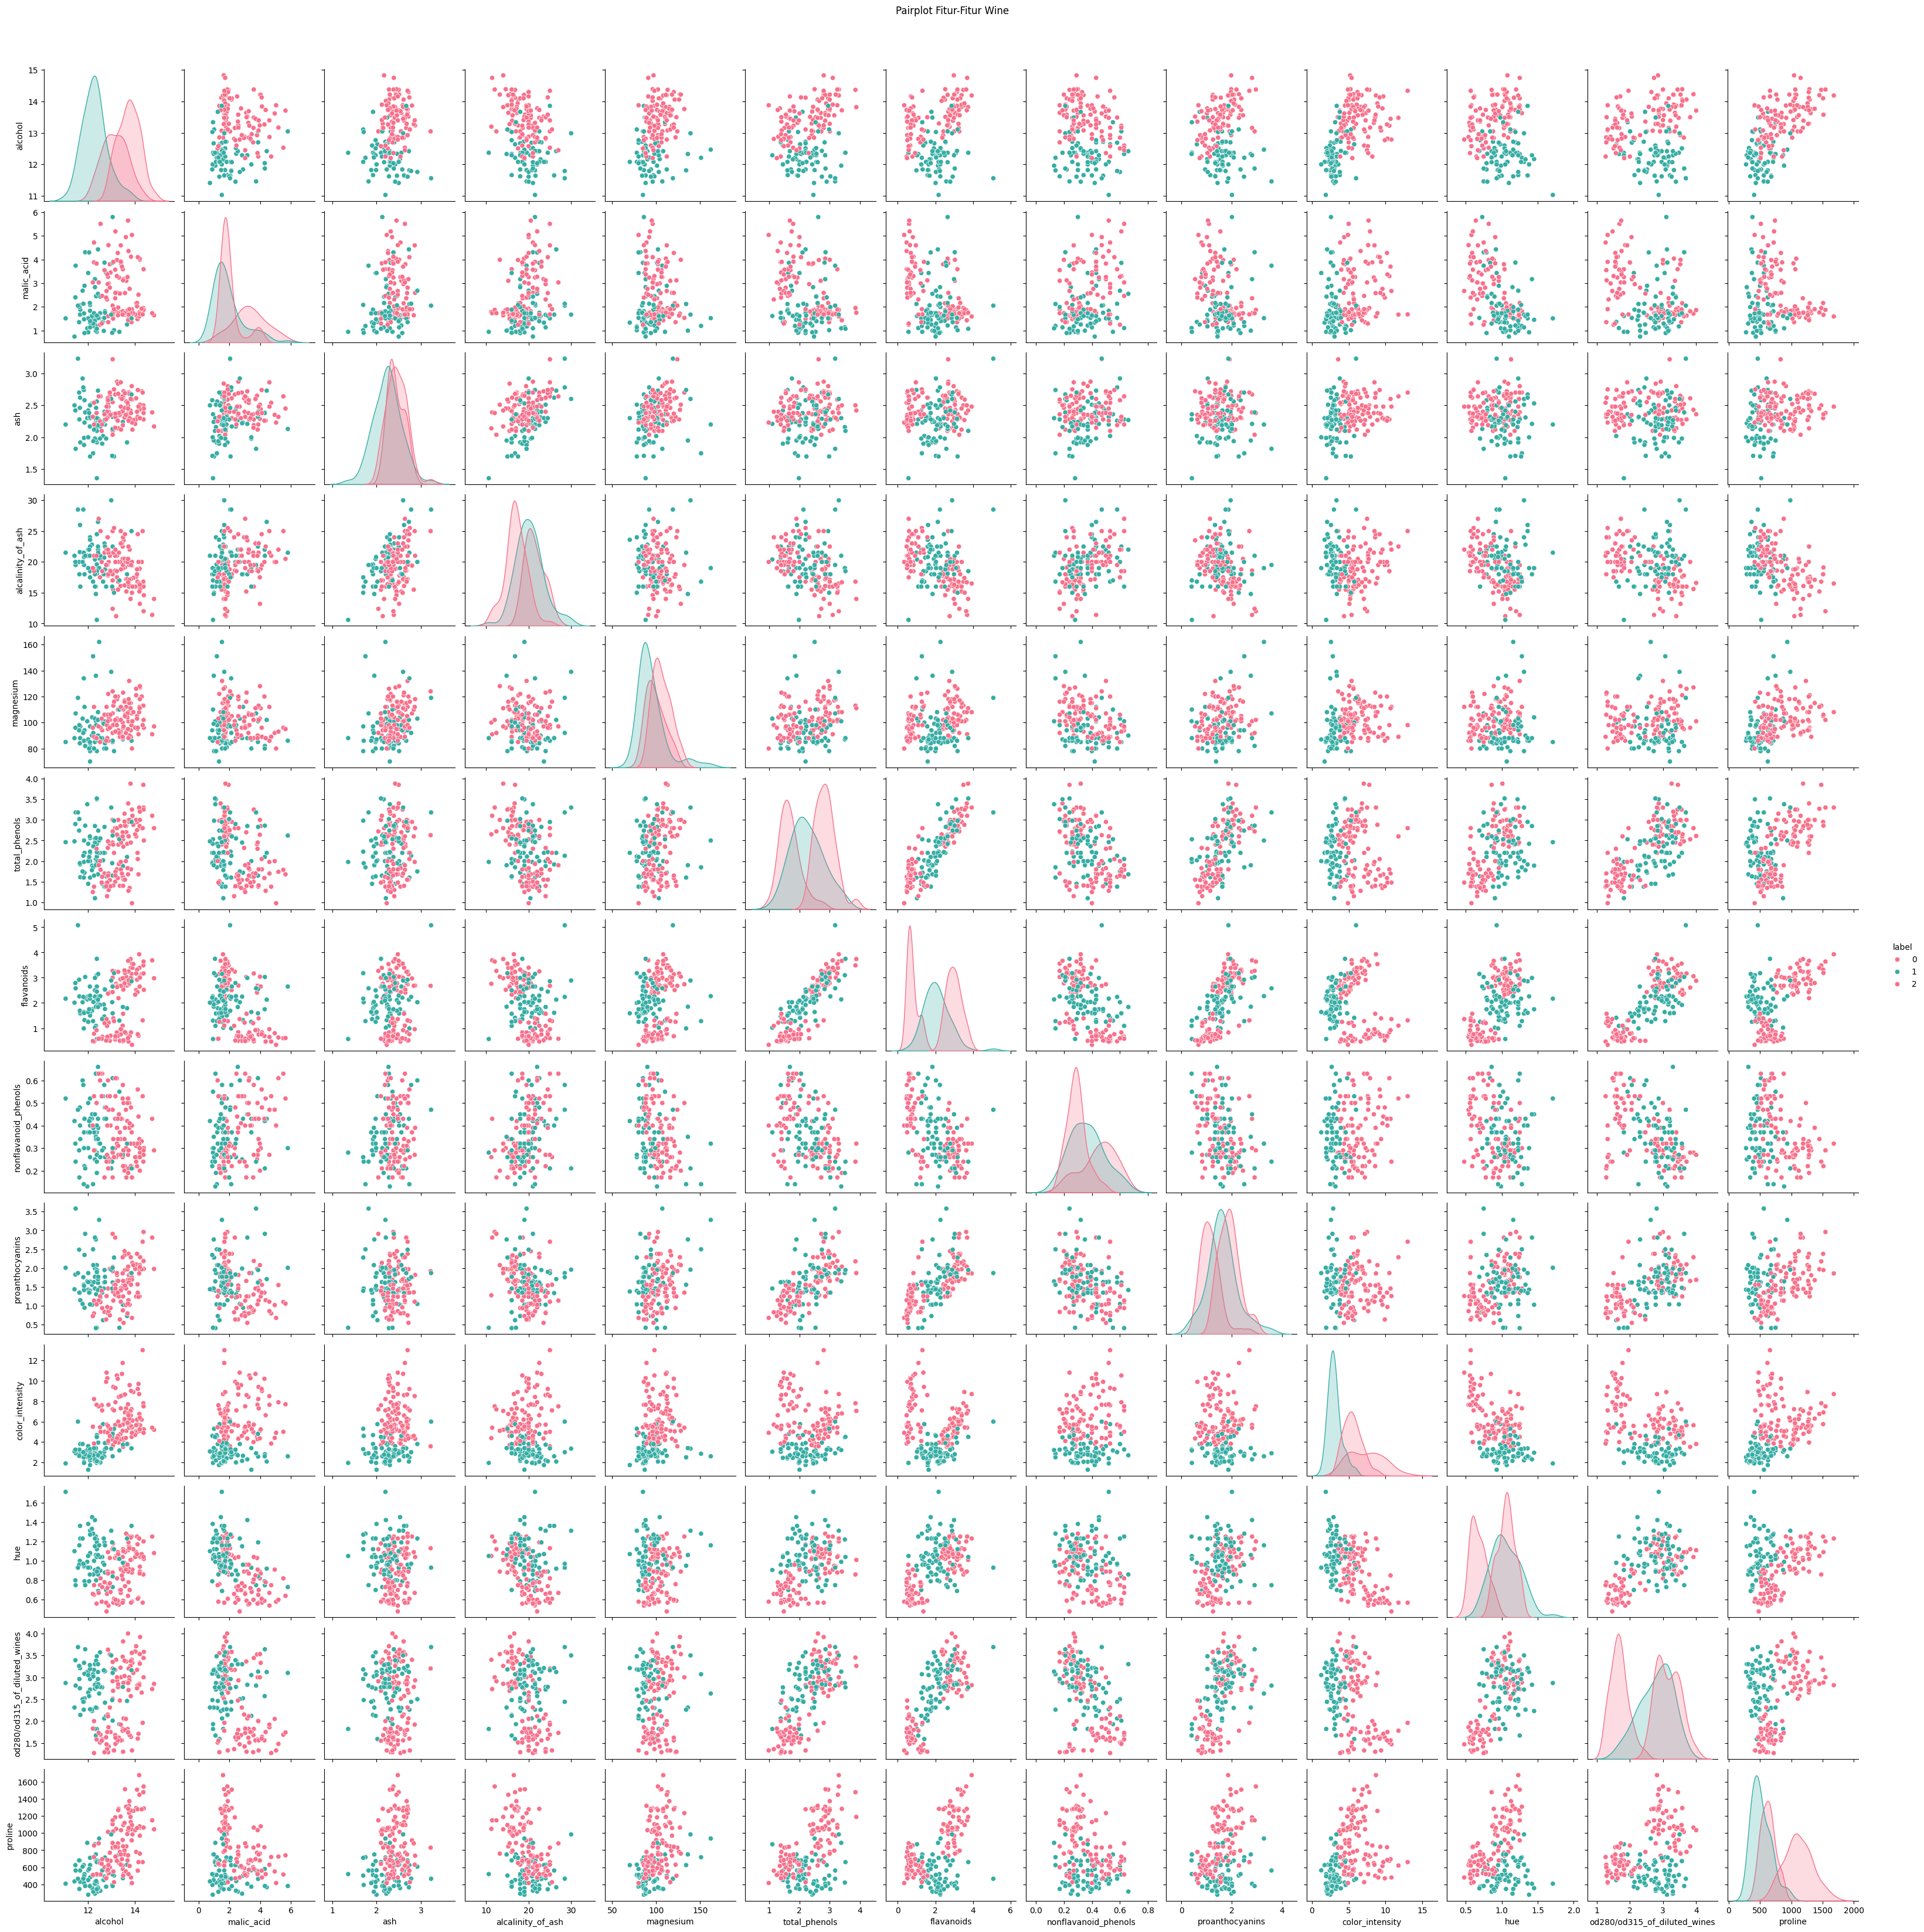

In [3]:
# Visualisasi Pairplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_wine, hue='label', palette='husl')
plt.suptitle("Pairplot Fitur-Fitur Wine", y=1.02)
plt.show()


In [4]:
# Pisah Fitur dan Label + Split Dataset
from sklearn.model_selection import train_test_split

X = df_wine.drop('label', axis=1)
Y = df_wine['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


In [5]:
# Buat dan Latih Model Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, Y_train)


DecisionTreeClassifier(random_state=0)

In [6]:
# Evaluasi Model
from sklearn.metrics import classification_report

Y_pred = clf.predict(X_test)
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.91      0.95      0.93        22
           2       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



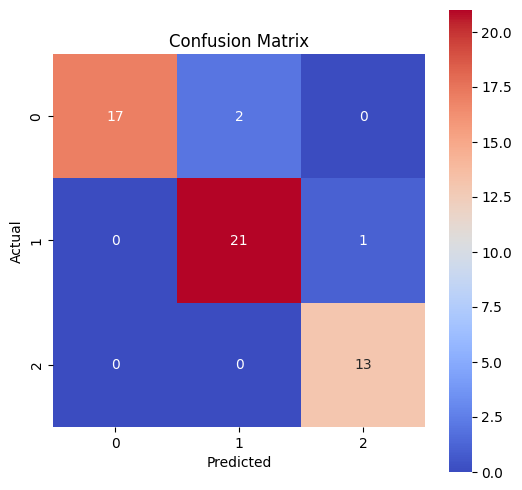

In [7]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', square=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [8]:
# Prediksi Data Baru
sample_wine = {
    'alcohol': 13.2,
    'malic_acid': 1.78,
    'ash': 2.14,
    'alcalinity_of_ash': 11.2,
    'magnesium': 100,
    'total_phenols': 2.5,
    'flavanoids': 2.7,
    'nonflavanoid_phenols': 0.3,
    'proanthocyanins': 1.4,
    'color_intensity': 5.2,
    'hue': 1.05,
    'od280/od315_of_diluted_wines': 3.0,
    'proline': 1050
}

input_df = pd.DataFrame([sample_wine])
input_df = input_df[X.columns]

hasil_prediksi = clf.predict(input_df)
print("Prediksi kelas untuk sampel baru:", hasil_prediksi[0])


Prediksi kelas untuk sampel baru: 0
